In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from data import load_data_nn, load_data_cnn
from models import MLP, CNN
from train import train_model
from eval import evaluate_model
# from helpers import  display_confusion_matrix
import plot_utils

AttributeError: module 'helpers' has no attribute 'plot_training_graphs'

In [81]:
# Set up reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
   print("CUDA")
else:
   print("Running on CPU")  

Running on CPU


In [82]:
batch_size = 64
num_epochs = 50

# --- Loading Data ---
train_loader_nn, val_loader_nn, test_loader_nn, x_test_nn, y_test_nn = load_data_nn(batch_size)

In [83]:
train_loader_iter = iter(train_loader_nn)
images, labels = next(train_loader_iter)

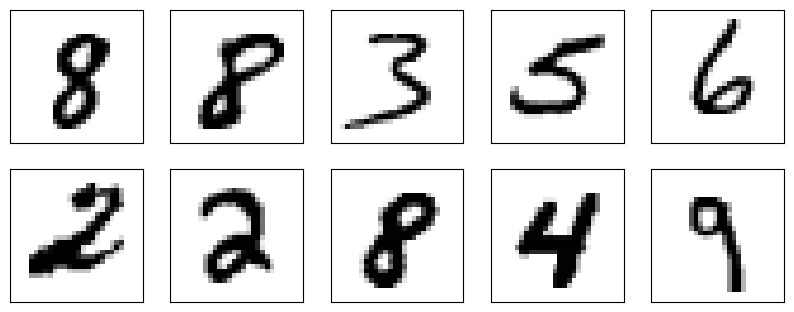

In [84]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

In [85]:
model_nn = MLP()
trained_model_nn, history_nn, training_time_nn = train_model(model_nn, train_loader_nn, val_loader_nn, "mlp", num_epochs)
print(f"Training time for NN: {training_time_nn:.2f} minutes.")


Epoch 1, Loss: 0.3260, Acc: 0.9065, Val Loss: 0.1386, Val Acc: 0.9585
Epoch 2, Loss: 0.1900, Acc: 0.9432, Val Loss: 0.1169, Val Acc: 0.9667
Epoch 3, Loss: 0.1537, Acc: 0.9536, Val Loss: 0.1024, Val Acc: 0.9682
Epoch 4, Loss: 0.1352, Acc: 0.9582, Val Loss: 0.0899, Val Acc: 0.9730
Epoch 5, Loss: 0.1264, Acc: 0.9618, Val Loss: 0.0895, Val Acc: 0.9742
Epoch 6, Loss: 0.1187, Acc: 0.9631, Val Loss: 0.0809, Val Acc: 0.9767
Epoch 7, Loss: 0.1124, Acc: 0.9651, Val Loss: 0.0821, Val Acc: 0.9760
Epoch 8, Loss: 0.1053, Acc: 0.9669, Val Loss: 0.0856, Val Acc: 0.9743
Epoch 9, Loss: 0.0995, Acc: 0.9682, Val Loss: 0.0750, Val Acc: 0.9765
Epoch 10, Loss: 0.0923, Acc: 0.9712, Val Loss: 0.0723, Val Acc: 0.9790
Epoch 11, Loss: 0.0933, Acc: 0.9707, Val Loss: 0.0725, Val Acc: 0.9789
Epoch 12, Loss: 0.0892, Acc: 0.9714, Val Loss: 0.0729, Val Acc: 0.9780
Epoch 13, Loss: 0.0915, Acc: 0.9708, Val Loss: 0.0737, Val Acc: 0.9788
Epoch 14, Loss: 0.0830, Acc: 0.9739, Val Loss: 0.0715, Val Acc: 0.9794
Epoch 15, Loss:

In [92]:
test_acc_nn, report_nn, cm_nn, test_preds_nn, test_labels_nn,summary_nn = evaluate_model(trained_model_nn, test_loader_nn)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              ReLU-2                  [-1, 256]               0
           Dropout-3                  [-1, 256]               0
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
       BatchNorm1d-8                  [-1, 128]             256
            Linear-9                   [-1, 10]           1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
-------------------------------------------

In [93]:
print(f"Test Accuracy for NN: {test_acc_nn * 100:.2f}%")

Test Accuracy for NN: 98.06%


In [91]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



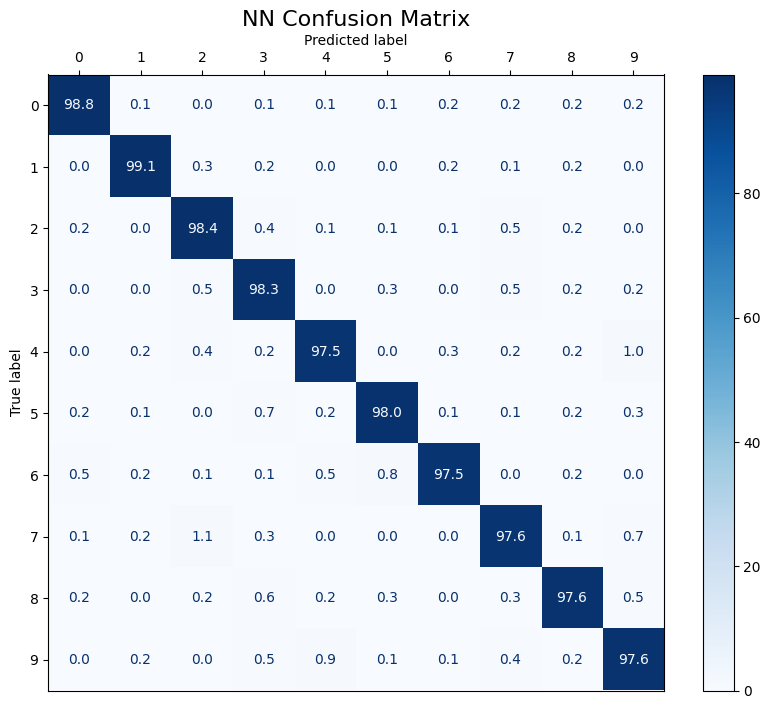

In [ ]:

from plot_utils import display_confusion_matrix
display_confusion_matrix(cm_nn, "NN Confusion Matrix")


In [ ]:
import plot_utils
print(plot_utils.__file__)
print(dir(plot_utils))  

e:\Master\mnist_pytorch\src\plot_utils.py
['ConfusionMatrixDisplay', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'np', 'plot_misclassified_images', 'plt']


In [ ]:
misclassified_nn = np.where(test_preds_nn != test_labels_nn)[0]
plot_utils.plot_misclassified_images(misclassified_nn, x_test_nn, y_test_nn, test_preds_nn, "NN Misclassified Images")
plot_utils.plot_training_graphs(history_nn, "NN", "NN Accuracy and Loss")

AttributeError: module 'helpers' has no attribute 'plot_misclassified_images'

In [ ]:
# def displayConfusionMatrix(cm, title):
#     cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     cm_percent = cm_normalized * 100
#     fig, ax = plt.subplots(figsize=(10, 8))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=range(10))
#     disp.plot(ax=ax, cmap="Blues", xticks_rotation="vertical", values_format=".1f")
#     ax.xaxis.set_label_position('top')
#     ax.xaxis.tick_top()
#     ax.set_title(title, fontsize=16)
#     plt.show()

def plotMissClassify(misclassified_indices, x_test, y_test, model_pred, title):
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(1, 10, i+1)
        img = x_test[idx]
        if img.ndim == 3:
            img = img.squeeze()
        plt.imshow(img, cmap='gray')
        plt.title(f"T:{y_test[idx]} P:{model_pred[idx]}")
        plt.axis('off')
    plt.show()

def plotGraph(historyRef, modelName, title):
    epochs = range(1, len(historyRef["accuracy"]) + 1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(title, fontsize=16)
    ax1.plot(epochs, historyRef["accuracy"], 'bo-', label=f"{modelName} Training Accuracy")
    ax1.plot(epochs, historyRef["val_accuracy"], 'b--', label=f"{modelName} Validation Accuracy")
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
    ax1.grid(True)
    ax2.plot(epochs, historyRef["loss"], 'ro-', label=f"{modelName} Training Loss")
    ax2.plot(epochs, historyRef["val_loss"], 'r--', label=f"{modelName} Validation Loss")
    ax2.set_title("Loss")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [17]:
# --- Training CNN ---
print("\n--- Training Convolutional Neural Network (CNN) with 10% Rotation ---")
train_loader_cnn, val_loader_cnn, test_loader_cnn, x_test_cnn, y_test_cnn = load_data_cnn(batch_size)
model_cnn = CNN()
trained_model_cnn, history_cnn, training_time_cnn = train_model(model_cnn, train_loader_cnn, val_loader_cnn, "cnn", num_epochs)
print(f"Training time for CNN: {training_time_cnn:.2f} minutes.")

# --- Evaluation and Visualization for CNN ---
print("\n--- Evaluation of Convolutional Neural Network (CNN) Model ---")
test_acc_cnn, report_cnn, cm_cnn, test_preds_cnn, test_labels_cnn, summary_cnn = evaluate_model(trained_model_cnn, test_loader_cnn, is_cnn=True)

print("Model Summary:")
print(summary_cnn)
print("\nClassification Report:")
print(report_cnn)
print(f"Test Accuracy: {test_acc_cnn * 100:.2f}%")

print("\nVisualizing Results for CNN:")
displayConfusionMatrix(cm_cnn, "CNN Confusion Matrix")
misclassified_cnn = np.where(test_preds_cnn != test_labels_cnn)[0]
plotMissClassify(misclassified_cnn, x_test_cnn.squeeze(), y_test_cnn, test_preds_cnn, "CNN Misclassified Images")
plotGraph(history_cnn, "CNN", "CNN Accuracy and Loss")


--- Training Convolutional Neural Network (CNN) with 10% Rotation ---


TypeError: pic should be Tensor or ndarray. Got <class 'PIL.Image.Image'>.